#### - Sobhan Moradian Daghigh
#### 
#### - 1/17/2022
#### 
#### - PR - EX03 - Q4 - All Parts

In [201]:
import pandas as pd
from PIL import Image
import numpy as np
import cv2
from skimage.util import view_as_blocks
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

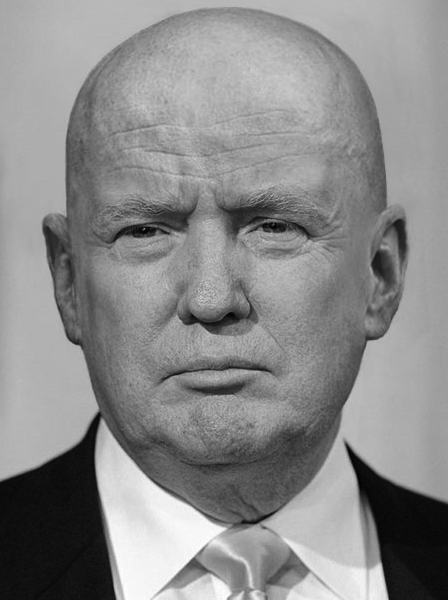

In [2]:
donald = Image.open('./inputs/P4/donald.png')
donald

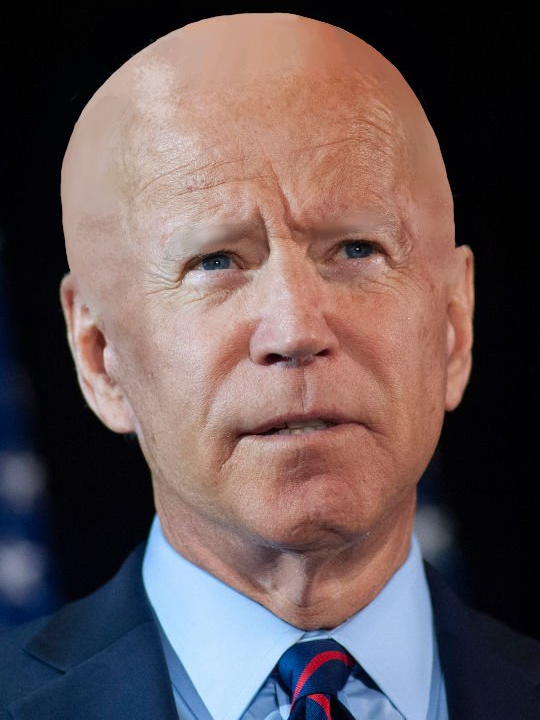

In [3]:
joe = Image.open('./inputs/P4/joe.png')
joe

### Part A.

In [4]:
donald = cv2.imread('./inputs/P4/donald.png')
joe = cv2.imread('./inputs/P4/joe.png')

In [5]:
patch_size = 8

In [6]:
def channel_merger(img):
    channels = []
    b, g, r = np.divide(cv2.split(img), 255)
    
    # Checking if a img is gray or color
    if ~((r == b).all() == True and (r == g).all() == True):
        return np.array([b, g, r])
    
    return np.array([b])

In [7]:
def reshaper(img):
    h, w = np.divmod(img.shape[:-1], patch_size)[0] * 8
    img = cv2.resize(img, (w, h))
    return img

In [8]:
def patch_extract(img):
    if ~(np.divmod(img.shape[:-1], patch_size)[1].any() == 0):
        img = reshaper(img)
    
    channels = channel_merger(img)
    # Using skimage to patching the images
    datas = []
    for channel in channels:
        dataset = []
        blocks = view_as_blocks(channel, block_shape=(patch_size, patch_size))
        for i in range(blocked.shape[0]):
            for j in range(blocked.shape[1]):
                dataset.append(blocks[i][j].reshape(patch_size ** 2))
        datas.append(pd.DataFrame(dataset))

    return datas

In [9]:
dataset_donald = patch_extract(donald)[0]
dataset_donald.shape

(4200, 64)

In [10]:
dataset_joe = patch_extract(joe)
print("b: {}".format(dataset_joe[0].shape))
print("g: {}".format(dataset_joe[1].shape))
print("r: {}".format(dataset_joe[2].shape))

b: (6030, 64)
g: (6030, 64)
r: (6030, 64)


### Part B.

In [11]:
donaldcov = dataset_donald.cov()
donaldcov

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.043921,0.043638,0.042931,0.042156,0.041391,0.040613,0.039774,0.038767,0.043766,0.043580,...,0.038806,0.038137,0.040324,0.040448,0.040273,0.039934,0.039595,0.039136,0.038567,0.037877
1,0.043638,0.044060,0.043733,0.042986,0.042217,0.041446,0.040616,0.039612,0.043474,0.043872,...,0.039408,0.038793,0.039985,0.040289,0.040376,0.040243,0.040012,0.039635,0.039125,0.038497
2,0.042931,0.043733,0.044229,0.043910,0.043140,0.042350,0.041536,0.040503,0.042865,0.043597,...,0.040067,0.039494,0.039662,0.040097,0.040421,0.040525,0.040454,0.040197,0.039765,0.039181
3,0.042156,0.042986,0.043910,0.044352,0.043944,0.043136,0.042321,0.041293,0.042162,0.042965,...,0.040592,0.040082,0.039275,0.039787,0.040232,0.040488,0.040612,0.040576,0.040277,0.039733
4,0.041391,0.042217,0.043140,0.043944,0.044203,0.043722,0.042915,0.041882,0.041402,0.042232,...,0.040832,0.040413,0.038767,0.039337,0.039854,0.040219,0.040485,0.040633,0.040473,0.040008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.039934,0.040243,0.040525,0.040488,0.040219,0.039944,0.039550,0.038924,0.040602,0.040968,...,0.043111,0.042190,0.043487,0.044404,0.045282,0.045695,0.045280,0.044390,0.043506,0.042430
60,0.039595,0.040012,0.040454,0.040612,0.040485,0.040284,0.039941,0.039377,0.040222,0.040713,...,0.043733,0.042838,0.042708,0.043619,0.044503,0.045280,0.045566,0.045037,0.044169,0.043097
61,0.039136,0.039635,0.040197,0.040576,0.040633,0.040542,0.040278,0.039789,0.039717,0.040298,...,0.044263,0.043523,0.041847,0.042743,0.043611,0.044390,0.045037,0.045245,0.044793,0.043829
62,0.038567,0.039125,0.039765,0.040277,0.040473,0.040540,0.040430,0.040066,0.039099,0.039745,...,0.044483,0.044088,0.040977,0.041842,0.042716,0.043506,0.044169,0.044793,0.045109,0.044470


In [12]:
joecovs = []
for channel in dataset_joe:
    joecovs.append(channel.cov())

In [49]:
pca_donald = PCA(n_components=20)
reduced_donald = pca_donald.fit_transform(donaldcov)
for val, vec in zip(pca_donald.explained_variance_, pca_donald.components_):
    print('eigenvalue: {}'.format(val))
    print('eigenvector: {}'.format(vec))
    print()

eigenvalue: 6.713220662987771e-05
eigenvector: [-0.10361799 -0.06178876 -0.01073928  0.04369114  0.09103899  0.13267041
  0.16812069  0.19313123 -0.12635236 -0.08352693 -0.03015608  0.02989517
  0.08374918  0.13028624  0.1695613   0.19471295 -0.155424   -0.11078503
 -0.05587705  0.00672649  0.06636225  0.11698076  0.15922798  0.18578887
 -0.18203721 -0.13815376 -0.08221756 -0.01969682  0.04488992  0.10037132
  0.1434598   0.17369265 -0.201758   -0.16647489 -0.10915517 -0.04544149
  0.016299    0.07844862  0.12547512  0.15648453 -0.21171547 -0.18248466
 -0.1310508  -0.06980392 -0.00790082  0.05501009  0.10239809  0.13900791
 -0.21758328 -0.19422134 -0.14952943 -0.09292601 -0.03421096  0.02780968
  0.07624344  0.11584097 -0.2192756  -0.19771808 -0.15731264 -0.10689874
 -0.05438581  0.00305961  0.05171019  0.09196816]

eigenvalue: 4.2836893305399224e-05
eigenvector: [ 0.16465185  0.16103508  0.14477145  0.12442859  0.10476161  0.08238237
  0.06229968  0.04127472  0.14377302  0.1381948   0

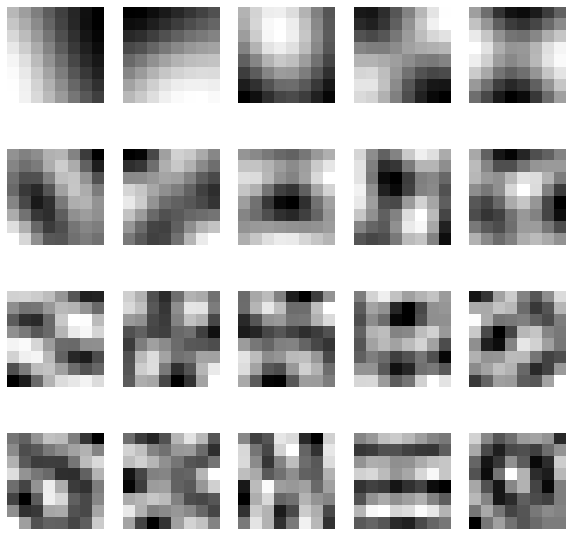

In [50]:
fig, ax = plt.subplots(4, 5, figsize=(10, 10))
[axi.set_axis_off() for axi in ax.ravel()]

for i, ax in enumerate(fig.axes):
    ax.imshow(pca_donald.components_[i].reshape(8, 8), cmap=plt.cm.binary)

In [51]:
for cov in joecovs:
    pca_joe = PCA(n_components=20)
    reduced_joe = pca_joe.fit_transform(cov)
    for val, vec in zip(pca_joe.explained_variance_, pca_joe.components_):
        print('eigenvalue: {}'.format(val))
        print('eigenvector: {} more...'.format(vec[:5]))
        print()
    print("\n-----------------------------------------------------------------------------------------\n\n")

eigenvalue: 7.734563200309335e-05
eigenvector: [-0.1388645  -0.10578707 -0.06324867 -0.00807555  0.05534977] more...

eigenvalue: 2.8647981226761974e-05
eigenvector: [-0.19163598 -0.20699348 -0.21728257 -0.22011582 -0.2143652 ] more...

eigenvalue: 1.852739315650332e-05
eigenvector: [ 0.00301781 -0.01519232 -0.03460442 -0.04323755 -0.03650722] more...

eigenvalue: 1.6299155288566485e-06
eigenvector: [ 0.19651566  0.20050404  0.17058126  0.09624325 -0.00254937] more...

eigenvalue: 6.421623490557839e-07
eigenvector: [-0.08774124  0.01365479  0.12230311  0.19904129  0.22292243] more...

eigenvalue: 2.0054081131312365e-07
eigenvector: [ 0.24285299  0.15220251 -0.01493893 -0.15185269 -0.19899682] more...

eigenvalue: 1.5342898582865394e-07
eigenvector: [0.21363896 0.16364137 0.10786351 0.05559166 0.00768909] more...

eigenvalue: 7.859293582981884e-08
eigenvector: [ 0.11259848 -0.06307536 -0.14721201 -0.07890346  0.07956175] more...

eigenvalue: 6.660277376627439e-08
eigenvector: [-0.037185

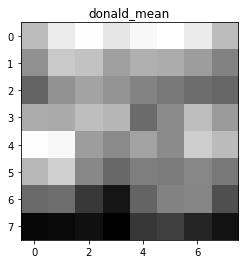

In [52]:
for i, data in enumerate([dataset_donald]): # dataset_joe
    if i == 1:
        b = data[0].mean().values.reshape(8, 8)
        g = data[1].mean().values.reshape(8, 8)
        r = data[2].mean().values.reshape(8, 8)
        img = cv2.merge([b, g, r])
        plt.imshow(img)
        
        
    else:
        img = np.array(data.mean().values.reshape(8, 8))
        plt.imshow(img, cmap='gray')
    
    plt.title(['donald_mean', 'joe_mean'][i])
    plt.show()

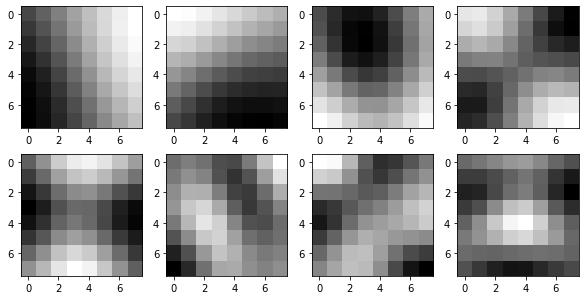

In [67]:
fig, ax = plt.subplots(2, 4, figsize=(10, 5))
for i, ax in enumerate(fig.axes):
    img = np.array(pca_donald.components_[i]).reshape(8, 8)
    ax.imshow(img, cmap='gray')
    
plt.show()

### Part C.

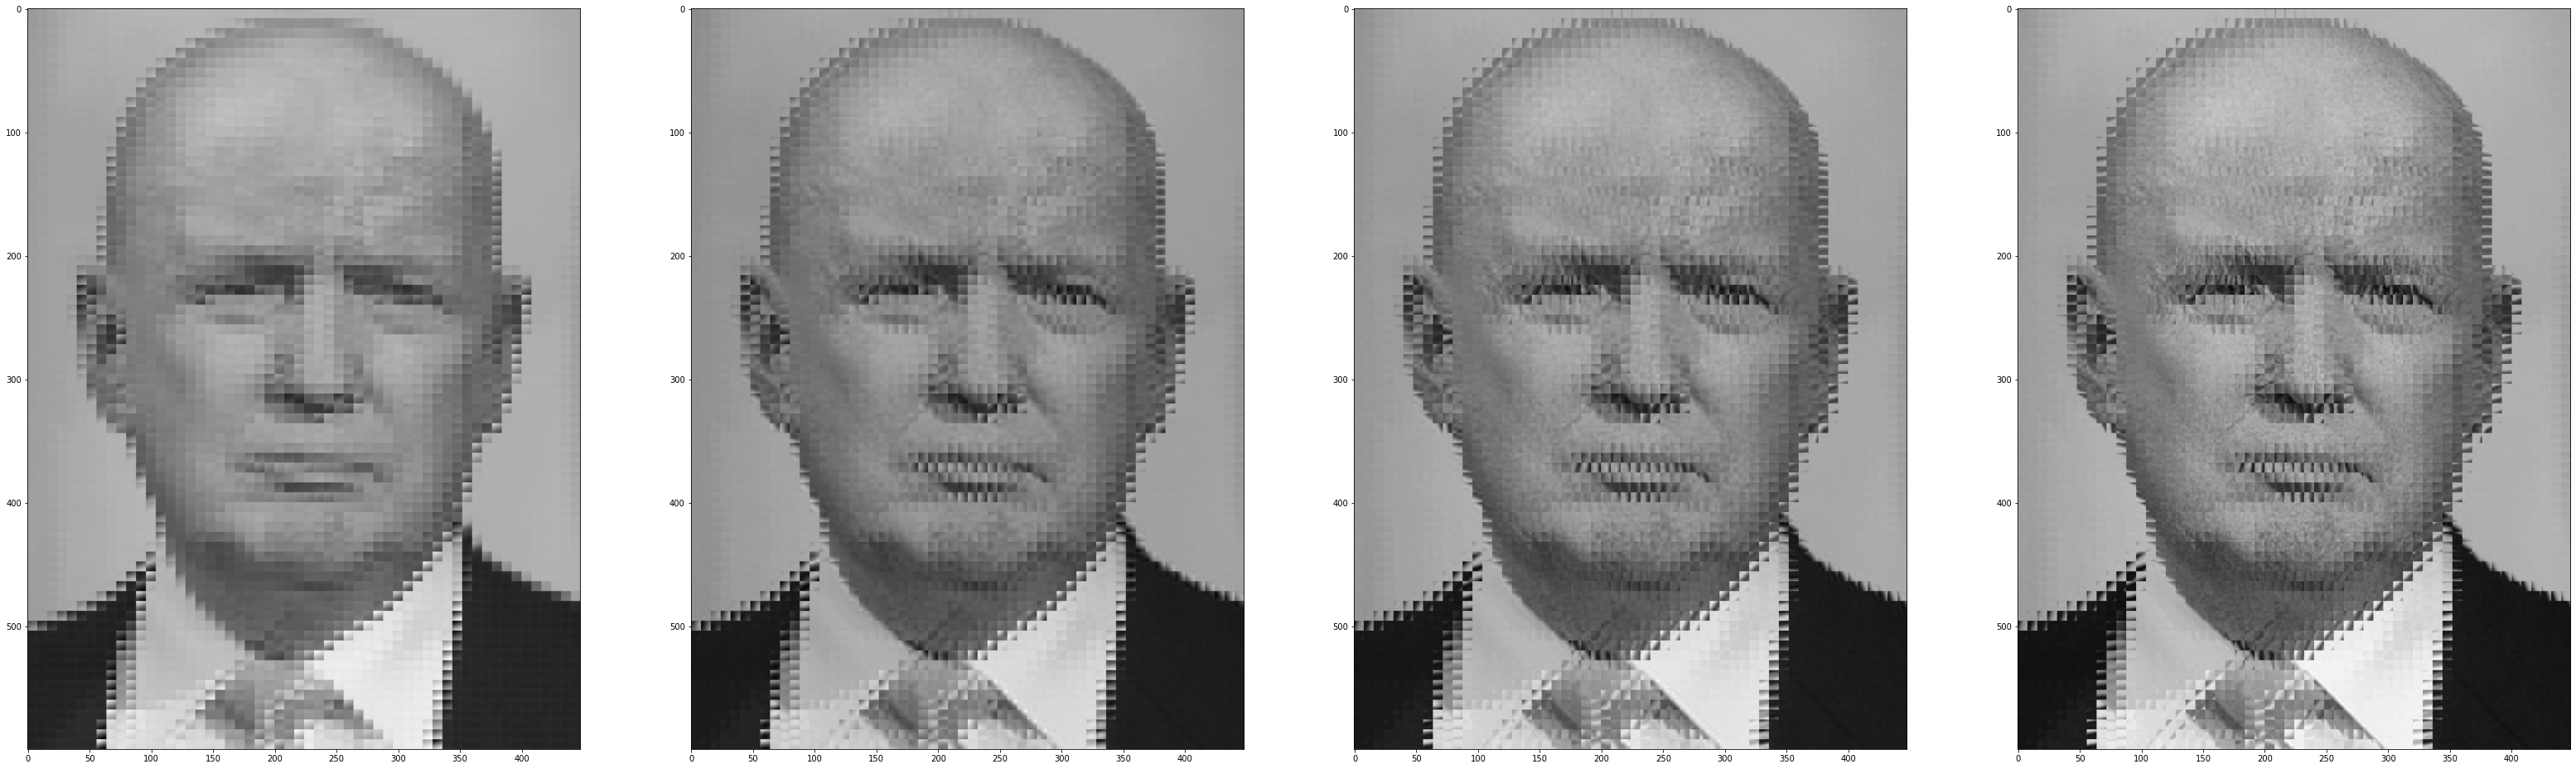

In [207]:
k = [2, 5, 10, 20]
fig, ax = plt.subplots(1, 4, figsize=(55, 50))
for i, ax in enumerate(fig.axes):
    
    # Compress
    pca_donald = PCA(n_components=k[i])
    reduced_donald = pca_donald.fit_transform(dataset_donald)
    
    # Reconstruct
    reduced_donald = pca_donald.inverse_transform(reduced_donald)
    reduced_donald = reduced_donald.reshape((donald.shape[1] // patch_size, donald.shape[0] // patch_size, patch_size, patch_size))
    reduced_donald = reduced_donald.transpose(0,2,1,3).reshape(donald.shape[1], donald.shape[0])
    reduced_donald = rotate(reduced_donald, -90)
    
    ax.imshow(reduced_donald, cmap='gray')
    ax.set_title('')
    
plt.show()